In [6]:

def printls(*args):
  return print(*args, sep='', end='\r')


In [7]:
def gradient_descent(_x, _y, _z, çbeta, elipse, state , çfig, àax, _learningrate, _epochs=5):
    arra = []
    temp_arra = []

    x = np.array(_x)
    y = np.array(_y)
    z = np.array(_z)
    N = len(_x) 

    print(çbeta)
    
    A = çbeta[0][1]
    B = çbeta[1][1]
    C = çbeta[2][1]

    D = çbeta[0][0]
    E = çbeta[1][0]
    F = çbeta[2][0]

    temp_A = A
    temp_B = B
    temp_C = C
                                  
    # equation = lambda A,B,C,D,X,Y: A*X.dot(X).sum()+B*Y.dot(Y).sum()+C*X.sum()+D*Y.sum()

    # equation1 = lambda A,B,C,D,X,Y: ((X-C)*(X-C))/(A*A)+( ((Y-D)*(Y-D)) /(B*B))
    # equation2 = lambda A,B,C,D,X,Y: ((X*(1-1/((X/A)**2+(Y/B)**2)**(1/2)))**2+(Y*(1-1/((X/A)**2+(Y/B)**2)**(1/2)))**2)**(1/2)
    # equation3 = lambda A,B,C,D,X,Y: ((X-( C+(X-C)/( ( (((X-C)**2)/(A**2))+(((Y-D)**2)/(B**2)) )**(1/2) )) )**2+ (Y-( D+(Y-D)/( ( (((X-C)**2)/(A**2))+(((Y-D)**2)/(B**2)) )**(1/2) )) )**2)**(1/2)
    # equation4 = lambda A,B,C,D,X,Y: ((C-X)**2+(D-Y)**2)**(1/2)-((C-( C+(X-C)/( ( (((X-C)**2)/(A**2))+(((Y-D)**2)/(B**2)) )**(1/2) )) )**2+ (D-( D+(Y-D)/( ( (((X-C)**2)/(A**2))+(((Y-D)**2)/(B**2)) )**(1/2) )) )**2)**(1/2)
    # equation5 = lambda A,B,C,D,E,F,X,Y: ((C-X)**2+(D-Y)**2)**(1/2)-((C-( C+(X-C)/( ( (((X-C)**2)/(A**2))+(((Y-D)**2)/(B**2)) )**(1/2) )) )**2+ (D-( D+(Y-D)/( ( (((X-C)**2)/(A**2))+(((Y-D)**2)/(B**2)) )**(1/2) )) )**2)**(1/2)
    
    # equation6 = lambda Cx,Cy,X,Y,S1,S2: dist2D(Cx, Cy, X, Y) - dist2D(Cx-(Cx+ (X-Cx)/dist12D(X, Y, Cx, Cy, S1, S2) ) ,Cy-(Cy+ (Y-Cy)/dist12D(X, Y, Cx, Cy, S1, S2)))
    equation7 = lambda Cx,Cy,Cz,X,Y,Z,S1,S2,S3: dist3D(Cx, Cy, Cz, X, Y, Z) - dist3D(Cx, Cy, Cz, Cx+ (X-Cx)/dist13D(X, Y, Z, Cx, Cy, Cz, S1, S2, S3) ,Cy+ (Y-Cy)/dist13D(X, Y, Z, Cx, Cy, Cz, S1, S2, S3), Cz+ (Z-Cz)/dist13D(X, Y, Z, Cx, Cy, Cz, S1, S2, S3))
    
    dist12D = lambda X1,Y1,X2,Y2,S1,S2 : ((X1-X2)**2/S1**2+(Y1-Y2)**2/S2**2)**(1/2)
    dist13D = lambda X1,Y1,Z1,X2,Y2,Z2,S1,S2,S3 : ((X1-X2)**2/S1**2+(Y1-Y2)**2/S2**2+(Z1-Z2)**2/S3**2)**(1/2)
    # dist2D = lambda X1,Y1,X2,Y2 : ((X1-X2)**2+(Y1-Y2)**2)**(1/2)
    dist3D = lambda X1,Y1,Z1,X2,Y2,Z2 : ((X1-X2)**2+(Y1-Y2)**2+(Z1-Z2)**2)**(1/2)

    my_delta = np.array(equation7(D, E, F, x, y, z, A, B, C))

    for i in range(0,_epochs+1):
        temp_arra.append(i-1)
    arra.append(temp_arra)
    for r in [A,B,C,D,E,F,my_delta.sum()]:
        temp_arra = []
        for j in range(0,_epochs+1):
            temp_arra.append(r)
        arra.append(temp_arra)
    i=0
    # print(arra)

    for H,e in enumerate([i, A, B, C, D, E, F, my_delta.sum()]):
        arra[H][0] = e 
                                      
    print("\nbegin: x\n", x, "\nend: x\n","\nbegin: y\n", y, "\nend: y\n","\nbegin: z\n", z, "\nend: z\n")

    lowest = [100000,0,0,0,0,0]
    
    displayResult(A, B, C, D, E, F, my_delta, arra, x, y, çfig, àax, elipse, çbeta)
    plt.show(block=False)
    plt.pause(1)
    bg = çfig.canvas.copy_from_bbox(çfig.bbox)
    # canvas.copy_from_bbox(fig.bbox)
    # for e in list_to_show:
    #     e[2].draw_artist(e[1][0])
    # plt.pause(1)
    çfig.canvas.blit(çfig.bbox)
    for i in range(1,_epochs+1):
        print([i, A, B, C, D, E, F, my_delta.sum()])
        updateResult(A, B, C, D, E, F, my_delta, arra, x, y, çfig, àax, elipse, çbeta, bg)
        printls(" ",i+1,' '*(len(str(_epochs))-len(str(i+1))),'/', _epochs, " | ",str(((i+1)*100)/_epochs)+"%")
        my_delta = np.array(equation7(D, E, F, x, y, z, A, B, C))
        # print("\nbegin: state\n", i,"|",A,"|",B,"|",C,"|",D,"|",my_delta.sum(),"\n", ellipse,"\nend: state\n","\nbegin: my_delta\n", my_delta, "\nend: my_delta\n")
        if (abs(my_delta.sum()) >= abs(lowest[0])) and i >= 10 : break
        if abs(my_delta.sum()) <= abs(lowest[0]): lowest=[my_delta.sum(),i,A,B,C,D,E,F]

        if state == 1:#just to make the calculation stand out
            A_temp = A
            B_temp = B
            C_temp = C
            D_temp = D
            E_temp = E
            F_temp = F
            
            A = A -_learningrate * ( (-2*(1/N))* (1/(A_temp*A_temp*A_temp)) * (abs((x-D_temp)**2)).dot(my_delta).sum() )
            B = B -_learningrate * ( (-2*(1/N))* (1/(B_temp*B_temp*B_temp)) * (abs((y-E_temp)**2)).dot(my_delta).sum() )
            C = C -_learningrate * ( (-2*(1/N))* (1/(C_temp*C_temp*C_temp)) * (abs((z-F_temp)**2)).dot(my_delta).sum() )
            
            D = D -_learningrate * ( (-2*(1/(N*N)))* (1/(A_temp*A_temp)) * (((D_temp-x).dot(my_delta)).sum()) )
            E = E -_learningrate * ( (-2*(1/(N*N)))* (1/(B_temp*B_temp)) * (((E_temp-y).dot(my_delta)).sum()) )
            F = F -_learningrate * ( (-2*(1/(N*N)))* (1/(C_temp*C_temp)) * (((F_temp-z).dot(my_delta)).sum()) )

        for H,e in enumerate([i, A, B, C, D, E, F, my_delta.sum()]):
            arra[H][i] = e
    print('\n', lowest)
    print(elipse)
    return A, B, C, D, E, F, my_delta.sum(), arra

In [8]:
def remove_plot(çax, y1, y2):
    for E,e in enumerate(çax):
        if y2>E and y1<=E:
            try:
                e.remove()
                # print("removed :")
            except:
                # print("tried to remove, but failed :")
                pass
        # print(E, e, y1, y2)


In [9]:

def graph_plot_more(çfig, çax, p1, P1, P2):
    remove_plot(çax, P1, P2)
    return çfig.add_subplot(çax[p1].get_gridspec()[p1,P1:P2])


In [10]:

def graph_plot_ellipse(çfig, çax, çP = [0,0,0], çlabel= ["",""], çvalues = [], çelip = [[0,0,0,0,'',""]]):
    ax1 = graph_plot_more(çfig, çax[çP[0]], çP[0], çP[1], çP[2])
    ax1.grid(True)
    ax1.set_xlabel(çlabel[0])
    ax1.set_ylabel(çlabel[1])
    global t
    for e in çelip:
        plot_ellipse_2D(ax1, t, e[0], e[1], e[2], e[3], e[4], e[5], çvalues)


In [11]:

def plot_ellipse_2D(çax, çt, çX, çY, çS1, çS2, çcolor, çname, çvalues):
  global list_to_show
  çEll = np.array([çS1*np.cos(çt) , çS2*np.sin(çt)])  
  list_to_show.append([çname, çax.plot( çX + çEll[0,:] , çY + çEll[1,:], çcolor, animated=True), çax, çax.scatter(çvalues[0], çvalues[1]), [çvalues[0], çvalues[1]] ])


In [12]:

def graph_plot_var(çfig, çax, çname_var, çarra,çname, pos = [0,0,0]):
    global list_to_show, num_step
    new_ax = graph_plot_more(çfig, çax[pos[0]], pos[0], pos[1], pos[2])
    new_ax.set_title(params[çname_var])
    new_ax.set_xticks([])
    # çax.yticks([])
    # list_to_show.append([çname, çax.plot(çarra[0], çarra[çname_var], 'o'), çax, çname_var])
    new_ax.set_xlim(-1, num_step)
    new_ax.set_autoscale_on(True)
    new_ax.set_autoscaley_on(True)
    new_ax.set_autoscalex_on(True)
    list_to_show.append([çname, new_ax.plot(çarra[0], çarra[çname_var], 'r-', animated=True), new_ax, çname_var])


In [13]:

def update_ellipse_2D(some, çax, çt, çX, çY, çS1, çS2):
    çEll = np.array([çS1*np.cos(çt) , çS2*np.sin(çt)])  
    some[1][0].set_xdata(çX + çEll[0,:])  
    some[1][0].set_ydata(çY + çEll[1,:])
    some[2].relim()
    some[2].autoscale_view()
    some[2].draw_artist(some[1][0])
    some[2].draw_artist(some[3])


In [14]:

def update_var(some, çax, çt, çX, çY):
    some[1][0].set_xdata(çX)
    some[1][0].set_ydata(çY)
    # some[2].set_ticks([10,20,30,çX,çY])
    # some[2].bbox.union([label.get_window_extent() for label in some[2].get_xticklabels()])
    some[2].relim()
    some[2].autoscale()
    some[2].set_yticks(some[2].get_yticks())
    # print(some[2])
    some[2].autoscale_view()
    some[2].draw_artist(some[1][0])



In [15]:

def updateResult(_A, _B, _C, _D, _E, _F, _my_delta, _arra, Xvalues, Yvalues, fig, ax ,_Elips, çbeta, bg):
    global list_to_show, t
    fig.canvas.restore_region(bg)
    for e in list_to_show:
        if e[0] == "ellipse":
            update_ellipse_2D(e, ax, t, _D, _E, _A, _B)
        if e[0] == "start ellipse":
            e[2].draw_artist(e[1][0])
        if e[0] == "var":
            update_var(e, ax, t, _arra[0], _arra[e[3]])
    fig.canvas.blit(fig.bbox)
    fig.canvas.flush_events()


In [16]:

def displayResult(_A, _B, _C, _D, _E, _F, _my_delta, _arra, Xvalues, Yvalues, fig, ax ,_Elips, çbeta):
    fig.clf()
    graph_plot_ellipse(fig, ax, [0, 0, 2], ["", ""], [Xvalues, Yvalues], [[_D, _E, _A, _B, 'g', "ellipse"], [çbeta[0][0], çbeta[1][0], çbeta[0][1], çbeta[1][1], 'r', "start ellipse"]])
    graph_plot_ellipse(fig, ax, [0, 2, 4], ["", ""], [Xvalues, Yvalues], [[_D, _E, _A, _B, 'g', "ellipse"]])
    graph_plot_ellipse(fig, ax, [0, 4, 6], ["", ""], [Xvalues, Yvalues], [[_D, _E, _A, _B, 'g', "ellipse"]])
    graph_plot_var(fig, ax, 1, _arra, "var", [1,0,1])
    graph_plot_var(fig, ax, 2, _arra, "var", [1,1,2])
    graph_plot_var(fig, ax, 3, _arra, "var", [1,2,3])
    graph_plot_var(fig, ax, 4, _arra, "var", [1,3,4])
    graph_plot_var(fig, ax, 5, _arra, "var", [1,4,5])
    graph_plot_var(fig, ax, 6, _arra, "var", [1,5,6])
    graph_plot_var(fig, ax, 7, _arra, "var", [2,0,6])
    plt.show(block = False)


In [17]:

def veleurs(çalpha, çbeta, çnum_var, çrandi, çstating):
    samples1 = 2*np.random.randn(çnum_var)
    ellipse = [ çbeta[0][0] + çalpha[0][0]*(np.random.randn()), çbeta[0][1] + çalpha[0][1]*(np.random.randn()), 
                çbeta[1][0] + çalpha[1][0]*(np.random.randn()), çbeta[1][1] + çalpha[1][1]*(np.random.randn()),
                çbeta[2][0] + çalpha[2][0]*(np.random.randn()), çbeta[2][1] + çalpha[2][1]*(np.random.randn()) ]
    Xinit = çstating[0] * (ellipse[0] + ellipse[1]*np.cos(samples1) + çrandi*np.random.randn(num_var))
    Yinit = çstating[1] * (ellipse[2] + ellipse[3]*np.sin(samples1) + çrandi*np.random.randn(num_var))
    Zinit = çstating[2] * (ellipse[4] + ellipse[5]*np.sin(samples1) + çrandi*np.random.randn(num_var))
    return Xinit, Yinit, Zinit, ellipse


In [23]:

def do_show(çalpha, çbeta, çnum_step, çnum_var, çrandi, çstating, learningrate = 0.05, _state=1):
    fig, ax = plt.subplots(3,6)
    # figManager = plt.get_current_fig_manager()
    # figManager.window.showMaximized()
    _X, _Y ,_Z, _Elip = veleurs(çalpha, çbeta, çnum_var, çrandi, çstating)
    çA, çB, çC, çD, çE, çF, çmy_delta, çarra = gradient_descent(_X, _Y, _Z, çbeta, _Elip, _state, fig, ax, _learningrate = learningrate, _epochs=çnum_step)
    # displayResult(çA, çB, çC, çD, çE, çF, çmy_delta, çtrace, _X, _Y, fig, ax, _Elip, çbeta)
    # print(çarra)
    sor_elli_val = [çnum_step, _Elip[1], _Elip[3], _Elip[5], _Elip[0], _Elip[2], _Elip[4], 0, "", "", ""]
    for H,e in enumerate(çarra):
        print(params[H], ": | begin: ", e[0], "| result: ",e[çnum_step], " | goal: ", sor_elli_val[H])
    # print()
    plt.show(block = True)


[[1000, 100, 1], [-1000, 100, 1], [0, 1, 0]]

begin: x
 [1048.55719769  933.81159526 1044.35255156  979.47256436 1001.0633228
 1088.17645049 1092.37992752  920.84513197 1093.74895014  968.62971973
 1089.0318645   926.89160426 1016.33054854 1072.61082178 1070.30055951
 1089.55692657 1088.22135026  904.02263402 1016.98355145 1064.73717554
 1037.48513359 1006.61090126  910.54290056 1055.10610291 1089.62655176
 1090.51249223 1046.15293479 1034.72292798 1069.1244809  1069.09477982
 1000.99408978 1093.7939151   931.88736375  909.99066995 1002.84152728
 1066.03103884 1040.46730408 1063.18891467  971.48358507  900.05967402
  920.16555234  919.80135424 1048.52579488  908.42550879  915.38569813
  921.37495629 1057.02959724 1047.26752448 1023.88111845 1082.71813446
 1066.91271343  947.2042927   903.74957961  961.04403921 1095.18868208
 1077.04154302  902.57909419 1055.08593164 1030.29211832 1065.26022943
 1092.65640631  908.97999597  902.23618447 1093.53902779 1058.16982348
  916.07892681 1087.12

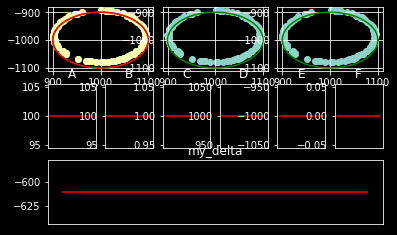

[1, 100, 100, 1, 1000, -1000, 0, -610.9386967081234]
[2, 99.96243569668734, 99.96622532700718, 1.0, 1000.0004486779455, -1000.0011345355903, 0.0, -610.9386967081234]
[3, 99.92520359989986, 99.93268833109778, 1.0, 1000.0008970938695, -1000.0022703455463, 0.0, -607.3556811226289]
[4, 99.88830170519746, 99.89938770659695, 1.0, 1000.0013452494895, -1000.0034074225858, 0.0, -603.8017055773173]
[5, 99.85172800636289, 99.86632214821371, 1.0, 1000.0017931465231, -1000.0045457594471, 0.0, -600.2766008793905]
[6, 99.81548049565896, 99.83349035116531, 1.0, 1000.0022407866876, -1000.0056853488895, 0.0, -596.7801977398798]
[7, 99.77955716408292, 99.80089101130005, 1.0, 1000.0026881716997, -1000.0068261836939, 0.0, -593.3123267936943]
[8, 99.74395600161792, 99.7685228252184, 1.0, 1000.0031353032757, -1000.0079682566627, 0.0, -589.8728186194766]
[9, 99.70867499748165, 99.73638449039248, 1.0, 1000.0035821831312, -1000.0091115606208, 0.0, -586.4615037591954]
[10, 99.67371214037199, 99.70447470528393, 1

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import pi, cos, sin

t = np.linspace(0, 2*pi, 100)
list_to_show = []

params = ["i", "A", "B", "C", "D", "E", "F", "my_delta"]
num_step = 100
num_var = 100
stating = [1,1,0]#[scale pos,..]
alpha = [[10, 10], [10, 10], [0, 0]]#[[scale alea coef, scale alea pos], ..]
beta = [[1000, 100, 1], [-1000, 100, 1], [0, 1, 0]]#[[scale pos, scale coef, scale alea pos], ..]
randi = 1
with plt.style.context('dark_background'):
    do_show(alpha, beta, num_step, num_var, randi, stating, learningrate = 1) 
